<a href="https://colab.research.google.com/github/DaryaTereshchenko/ukr/blob/main/GloVe_SM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Flatten, Input, Dropout, Embedding, BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
filename = "/content/drive/MyDrive/embraw.pickle"
with open(filename, 'rb') as f:
    classification_dict = pickle.load(f)

In [ ]:
df = pd.DataFrame(classification_dict)

In [ ]:
df_glove = df.drop(["source"], axis = 1)

In [ ]:
news_0 = pd.read_csv('news_0.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news_0['source'] = 0

news_1 = pd.read_csv('news_1.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news_1['source'] = 1

news_2 = pd.read_csv('news_2.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news_2['source'] = 2

news_3 = pd.read_csv('news_3.csv',  sep=";", decimal=",", 
                   skiprows=[1,2,3,4], low_memory=False, on_bad_lines='skip').sort_values(by=["CODE"])
news_3['source'] = 3



In [ ]:
frames = [news_0, news_1, news_2, news_3]
data = pd.concat(frames).drop(["CODE"], axis=1)

In [ ]:
fs = [df_glove.reset_index(drop=True), data.reset_index(drop=True)]

In [ ]:
dfinal = pd.concat(fs, ignore_index=True, axis=1)

In [ ]:
X = dfinal.dropna(axis=0)

In [ ]:
y = np.asarray(X.iloc[:, -1:], dtype="int32")

In [ ]:
X_data = X.drop(X.columns[-1], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=66)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=66)

In [ ]:
X_train.shape

(20540, 45101)

In [ ]:
# Encode the categories
y_train = to_categorical(np.asarray(y_train), dtype ="uint8")
y_test = to_categorical(np.asarray(y_test), dtype ="uint8")
y_val = to_categorical(np.asarray(y_val), dtype ="uint8")

In [ ]:
def build_model():
    i = Input(shape=(45101), dtype=tf.float32)
    output = Dense(4, activation='softmax')(i)

    model = Model(inputs=i, outputs=output)

    model.compile(optimizer="Adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"])
    return model

In [ ]:
model = build_model()
model.summary()

In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose=1, validation_data=(X_val, y_val))

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)
y_pred_one_hot = to_categorical(np.asarray(y_pred), dtype ="uint8")

145/145 [==============================] - 1s 4ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print("=== Classification Report ===")
print(classification_report(y_test, y_pred_one_hot))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, y_pred_one_hot))


In [ ]:
y_test = np.asarray(y_test).argmax(axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 200, n_jobs=-1, random_state=0)

# Training the model on the training dataset
# fir function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

#performing predictions on the test dataset
pred = clf.predict(X_test)

# print (clf.score(normed_train_data, y_train))
# print(clf.score(X_test, y_test))

#metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, pred))

<ipython-input-14-eb2607866bc0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)



ACCURACY OF THE MODEL:  0.7185201211596711


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print("=== Classification Report ===")
print(classification_report(y_test, pred))
print('\n')
print("=== Accuracy Score ===")
print(accuracy_score(y_test, pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       383
           1       0.62      0.93      0.74      1675
           2       0.79      0.76      0.77      1296
           3       0.90      0.61      0.73      1268

    accuracy                           0.72      4622
   macro avg       0.83      0.58      0.57      4622
weighted avg       0.78      0.72      0.69      4622



=== Accuracy Score ===
0.7185201211596711


In [ ]:
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt


def plot_cm(y_true, y_pred, normalize,
    labels=None,
    save=False,
    directory=None,
    filename=None,
    title="",
    cmap=plt.cm.Blues,
):
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=cmap)
    plt.title(title)
    plt.show()

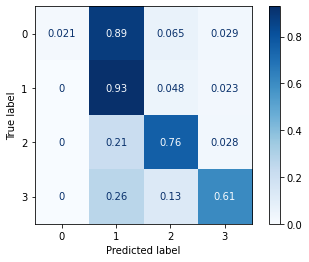

In [ ]:
plot_cm(y_test, pred, 'true')